In [2]:
import numpy as np
from scipy.interpolate import interp1d
import basis_set_exchange as bse
from pyscf import gto,scf
from pyscf.grad import rhf as grhf
from pyscf.hessian import rhf as hrhf
from matplotlib import pyplot as plt
import sys
sys.path.append( '/home/administrator/Documenti/APDFT/prototyping/hessian/AAFF/Libs')


In [3]:
%load_ext autoreload
%autoreload 2
from AP_class import APDFT_perturbator as AP

In [4]:
from Morse import Morse_interpolator

In [5]:
def MorseV(r,D,a,re):
    return D*(np.exp(-2*a*(r-re))-2*np.exp(-a*(r-re)))+D

In [6]:
def Morse_dE(r,r_e,a,De):
    return De*((np.exp(a*(r_e-r))-1)**2)

## Minima for N2, CO

In [7]:
pcx2=bse.get_basis("pcX-2",fmt="nwchem",elements=[6,8])

In [8]:
R_min=2.08272
mol=gto.M(atom="C 0 0 0;O 0 0 {}".format(R_min), unit="Bohr",basis=pcx2)
mf=scf.RHF(mol)
e_min=mf.scf()
mf.Gradients().grad()[1,2]

converged SCF energy = -112.786616218695
--------------- RHF gradients ---------------
         x                y                z
0 C    -0.0000000000    -0.0000000000    -0.0000019315
1 O     0.0000000000     0.0000000000     0.0000019315
----------------------------------------------


1.9314627870414824e-06

In [9]:
R0=1.6
mol=gto.M(atom="C 0 0 0;O 0 0 {}".format(R0), unit="Bohr",basis=pcx2)
mf=scf.RHF(mol)
e_co=mf.scf()
g=mf.Gradients().grad()[1,2]
h=mf.Hessian().hess()[1,1,2,2]

converged SCF energy = -112.450781498809
--------------- RHF gradients ---------------
         x                y                z
0 C     0.0000000000    -0.0000000000     1.8744488798
1 O    -0.0000000000     0.0000000000    -1.8744488798
----------------------------------------------


In [10]:
bde= 100*3/627.5
mi=Morse_interpolator(g,h,R0,bde,e_co)
mi.re,mi.e_min

(2.0664346740073176, -112.77899133698268)

In [11]:
e_co,g,h

(-112.45078149880942, -1.8744488797821148, 7.777987397782596)

In [12]:
def par(r):
    return h*r**2/2+r*(g-R0*h )+e_co -(h*R0**2/2+R0*(g-R0*h ))

In [13]:
par(R0)

-112.45078149880942

In [14]:
10000**2*(par(R0+.0001)+par(R0-.0001)-2*par(R0)),10000*(par(R0+.0001)-par(R0))

(7.77798732087831, -1.874059980337961)

In [15]:
pltlsp=np.linspace(1.45,4,120)
qapp=e_co+h/2*(pltlsp-R0)**2+g*(pltlsp-R0)

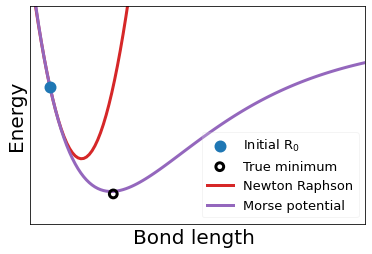

In [16]:
pltlsp=np.linspace(1.45,4,120)

#plt.scatter(R0,e_co,color="black",zorder=3,s=60,label="Initial R$_0$")
plt.scatter(R0,e_co,facecolor="C0",edgecolor="C0",lw=3,zorder=3,s=80,label="Initial R$_0$")
plt.scatter(R_min,e_min,facecolor="None",edgecolor="black",lw=3,zorder=3,s=60,label="True minimum")

#plt.axvline(R_min,ls=":",color="black",label=" R minimum")

plt.plot(pltlsp,qapp)
plt.plot(pltlsp,par(pltlsp),lw=3,label="Newton Raphson",color="C3")
plt.plot(pltlsp,mi.E(pltlsp),lw=3,label="Morse potential",color="C4")
plt.xlim(1.45,4)
plt.ylim(-112.88,-112.2)
plt.legend(loc=4,fontsize=13,framealpha=0.2)
plt.ylabel("Energy",fontsize=20)
plt.xlabel("Bond length ",fontsize=20)
plt.xticks([])
plt.yticks([])
plt.savefig("Morse_vs_NR.png",bbox_inches="tight")

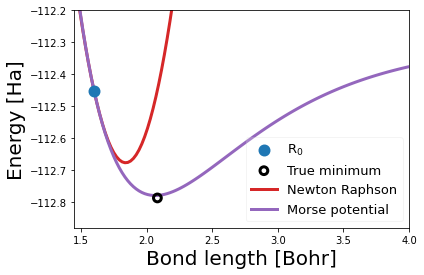

In [18]:
pltlsp=np.linspace(1.45,4,120)

#plt.scatter(R0,e_co,color="black",zorder=3,s=60,label="Initial R$_0$")
plt.scatter(R0,e_co,facecolor="C0",edgecolor="C0",lw=3,zorder=3,s=80,label="R$_0$")
plt.scatter(R_min,e_min,facecolor="None",edgecolor="black",lw=3,zorder=3,s=60,label="True minimum")

#plt.axvline(R_min,ls=":",color="black",label=" R minimum")

plt.plot(pltlsp,qapp)
plt.plot(pltlsp,par(pltlsp),lw=3,label="Newton Raphson",color="C3")
plt.plot(pltlsp,mi.E(pltlsp),lw=3,label="Morse potential",color="C4")
plt.xlim(1.45,4)
plt.ylim(-112.88,-112.2)
plt.legend(loc=4,fontsize=13,framealpha=0.2)
plt.ylabel("Energy [Ha]",fontsize=20)
plt.xlabel("Bond length [Bohr]",fontsize=20)
#plt.xticks([])
#plt.yticks([])
plt.savefig("Morse_vs_NR_2.png",bbox_inches="tight")

In [39]:
help(interp1d)

Help on class interp1d in module scipy.interpolate.interpolate:

class interp1d(scipy.interpolate.polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``. This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string or as an integer
 |      specifying the order of the spline interpolator to use.
 |      The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
 |      'slinear', 'quadrati

## Figure in the SI

In [44]:
R0=1.9
mol=gto.M(atom="C 0 0 0;O 0 0 {}".format(R0), unit="Bohr",basis=pcx2)
mf=scf.RHF(mol)
e_co=mf.scf()
g=mf.Gradients().grad()[1,2]
h=mf.Hessian().hess()[1,1,2,2]

converged SCF energy = -112.754571293095
--------------- RHF gradients ---------------
         x                y                z
0 C    -0.0000000000     0.0000000000     0.3916813613
1 O     0.0000000000    -0.0000000000    -0.3916813613
----------------------------------------------


In [45]:
def mpa(g_,h_,R0_,De_): # Morse Potential Approximation
    Z=g_**2/(2*De_)/h_
    for i in range(3):
        t=float(np.roots([1,-2,1-2*Z,+Z])[i])
        a=g_/(2*De_)/(t*(1-t))
        dX=np.log(t)/a
        if a>0 and t>0:
            return R0_+dX,a
    return -1

In [46]:
def Morse(r,r_e,a,De,R0,e0):
    return De*((np.exp(a*(r_e-r))-1)**2-(np.exp(a*(r_e-R0))-1)**2)+e0

In [47]:
mpa(g,h,R0,bde)

(2.0833758243500964, 1.2560916261987223)

In [48]:
scan_r=np.linspace(1.7,2.4,31)
#scan_e=[]
#for r in scan_r:
#    scan_e.append(scf.RHF(gto.M(atom="C 0 0 0;O 0 0 {}".format(r), unit="Bohr",basis=pcx2,verbose=0)).scf())
#np.save("scan_CO",np.asarray(scan_e))

In [49]:
scan_e=np.load("scan_CO.npy")

In [50]:
scan_r_I=np.linspace(1.7,2.4,3001)
scan_e_I=interp1d(scan_r,scan_e,kind="cubic") #,scan_r_I,
scan_e_I=scan_e_I(scan_r_I)

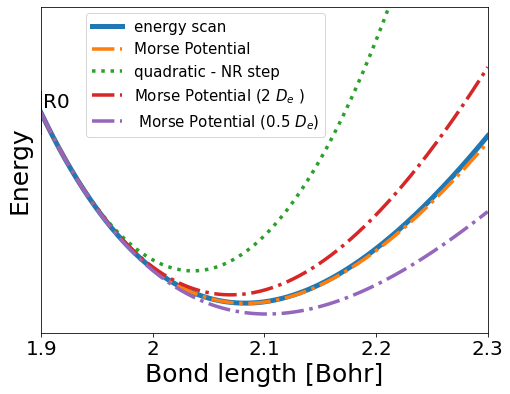

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(R0,e_co,color="black",marker='|',s=2000)
plt.text(R0+.002,e_co+.001,"R0",size=20)
plt.plot(scan_r_I,scan_e_I,lw=5,label="energy scan")
plt.plot(scan_r_I,Morse(scan_r_I, *mpa(g,h,R0,bde) ,bde ,R0,e_co),ls="-." ,lw=3.5,\
                                         label="Morse Potential")
q_app1=e_co+h/2*(scan_r_I-R0)**2+g*(scan_r_I-R0)

plt.plot(scan_r_I,q_app1,ls=":",label="quadratic - NR step",lw=3.5)

plt.plot(scan_r_I,Morse(scan_r_I, *mpa(g,h,R0,2*bde) ,2*bde ,R0,e_co),ls="-.",lw=3.5,\
         label="Morse Potential ($2 \ D_e $ )")

plt.plot(scan_r_I,Morse(scan_r_I, *mpa(g,h,R0,.5*bde) ,.5*bde,R0,e_co ),ls="-.",lw=3.5,\
                                         label=" Morse Potential ($0.5 \ D_e $)")
plt.ylim(e_min-.005,e_min+.05)
plt.xlim(1.9,2.3)
plt.legend(fontsize=15,loc=(.1,.6))
plt.yticks([])
plt.xticks([1.9,2,2.1,2.2,2.3],labels=["1.9","2","2.1","2.2","2.3"],fontsize=20)
plt.ylabel("Energy",fontsize=25,labelpad=10)
plt.xlabel("Bond length [Bohr]",fontsize=25)
#plt.title("Interpolation comparison \n for the dissociation of CO",fontsize=25,pad=10)
plt.savefig("Morse_CO_1.png",bbox_inches="tight")